Part 1
5. Customer Profiling
6. Visualizations to the distribution of profiles
7. Aggregate the Max, Mean and Min Variables
8. Comparison: customer profiles with regions and departments
Part 2
1. Ordering habits

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Josepa Cusidó\092022 Instacart Basket Analysis'

In [3]:
ords_prods_customers = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_Products_Customers.csv'))

In [4]:
ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635620 entries, 0 to 13635619
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0.1             int64  
 1   Unnamed: 0               int64  
 2   order_id                 int64  
 3   user_id                  int64  
 4   order_number             int64  
 5   orders_day_of_week       int64  
 6   order_time               int64  
 7   days_since_prior_order   float64
 8   product_id               int64  
 9   add_to_cart_order        int64  
 10  reordered                int64  
 11  product_name             object 
 12  aisle_id                 int64  
 13  department_id            int64  
 14  prices                   float64
 15  price_range_loc          object 
 16  busiest_days             object 
 17  busiest_period_of_day    object 
 18  max_order                int64  
 19  loyalty_flag             object 
 20  mean_prices              float64
 21  spendi

In [5]:
ords_prods_customers = ords_prods_customers.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'])

In [6]:
ords_prods_customers['order_id']=ords_prods_customers['order_id'].astype('int32')
ords_prods_customers['user_id']=ords_prods_customers['user_id'].astype('int32')
ords_prods_customers['order_number']=ords_prods_customers['order_number'].astype('int32')
ords_prods_customers['order_time']=ords_prods_customers['order_time'].astype('int32')
ords_prods_customers['days_since_prior_order']=ords_prods_customers['days_since_prior_order'].astype('float16')
ords_prods_customers['product_id']=ords_prods_customers['product_id'].astype('int32')
ords_prods_customers['add_to_cart_order']=ords_prods_customers['add_to_cart_order'].astype('int32')
ords_prods_customers['reordered']=ords_prods_customers['reordered'].astype('int32')
ords_prods_customers['aisle_id']=ords_prods_customers['aisle_id'].astype('int32')
ords_prods_customers['dpartment_id']=ords_prods_customers['department_id'].astype('int32')
ords_prods_customers['prices']=ords_prods_customers['prices'].astype('float16')
ords_prods_customers['max_order']=ords_prods_customers['max_order'].astype('int32')
ords_prods_customers['mean_prices']=ords_prods_customers['mean_prices'].astype('float16')
ords_prods_customers['median_days_prior_order']=ords_prods_customers['median_days_prior_order'].astype('int32')
ords_prods_customers['Age']=ords_prods_customers['Age'].astype('int32')
ords_prods_customers['n_dependants']=ords_prods_customers['n_dependants'].astype('int32')
ords_prods_customers['income']=ords_prods_customers['income'].astype('int32')

In [7]:
ords_prods_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13635620 entries, 0 to 13635619
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 int32  
 1   user_id                  int32  
 2   order_number             int32  
 3   orders_day_of_week       int64  
 4   order_time               int32  
 5   days_since_prior_order   float16
 6   product_id               int32  
 7   add_to_cart_order        int32  
 8   reordered                int32  
 9   product_name             object 
 10  aisle_id                 int32  
 11  department_id            int64  
 12  prices                   float16
 13  price_range_loc          object 
 14  busiest_days             object 
 15  busiest_period_of_day    object 
 16  max_order                int32  
 17  loyalty_flag             object 
 18  mean_prices              float16
 19  spending_flag            object 
 20  median_days_prior_order  int32  
 21  frecue

# 5. Customer profiling

In [8]:
# 5. Create a profiling: age
ords_prods_customers.loc[ords_prods_customers['Age']<=35, 'age_group']='young'
ords_prods_customers.loc[(ords_prods_customers['Age']<=60)&(ords_prods_customers['Age']>35), 'age_group']='middle'
ords_prods_customers.loc[ords_prods_customers['Age']>60, 'age_group']='older'
ords_prods_customers['age_group'].value_counts(dropna=False)

middle    5331919
older     4454140
young     3849561
Name: age_group, dtype: int64

In [9]:
# 5. Create a profiling: income
ords_prods_customers.loc[ords_prods_customers['income']<=60000, 'income_group']='low income'
ords_prods_customers.loc[(ords_prods_customers['income']<160000)&(ords_prods_customers['income']>60000), 'income_group']='middle income'
ords_prods_customers.loc[ords_prods_customers['income']>=160000, 'income_group']='high income'
ords_prods_customers['income_group'].value_counts(dropna=False)

middle income    10165812
low income        2528553
high income        941255
Name: income_group, dtype: int64

In [10]:
# 5. Create a profiling: goods
ords_prods_customers['department_id'].value_counts()

4     4028206
16    2295861
19    1219872
7     1132363
1      917345
13     776778
3      493508
15     439844
20     439410
9      356574
17     299038
12     294791
14     294365
18     187477
11     183704
6      111536
5       63480
8       40404
21      30864
2       15177
10      15023
Name: department_id, dtype: int64

In [11]:
# alcohol (5), meat/fish (12), babies (18), pets (8)
result = []

for value in ords_prods_customers["department_id"]: 
    if value == 5:
        result.append("alcohol")
    elif value == 12: 
        result.append("meat_fish")
    elif value == 18:
        result.append("babies")
    elif value == 8:
        result.append("pets")
    else:
        result.append("other")

In [12]:
ords_prods_customers['department'] = result

In [13]:
ords_prods_customers['department'].value_counts(dropna = False)

other        13049468
meat_fish      294791
babies         187477
alcohol         63480
pets            40404
Name: department, dtype: int64

In [14]:
# 5. Create a profiling: number of dependents 
ords_prods_customers.loc[ords_prods_customers['n_dependants']>0, 'dependant_group']='has dependents'
ords_prods_customers.loc[ords_prods_customers['n_dependants']==0, 'dependant_group']='no dependents'
ords_prods_customers['dependant_group'].value_counts(dropna=False)

has dependents    10222717
no dependents      3412903
Name: dependant_group, dtype: int64

# 6. Visualizations to the distribution of profiles

In [15]:
#Subset of unique customers
df_customers=ords_prods_customers.drop_duplicates(subset='user_id')

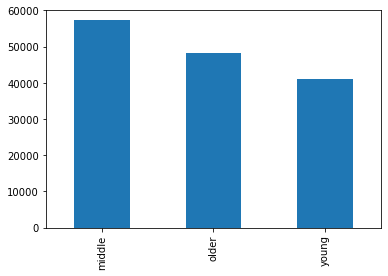

In [16]:
# 6. Age profiling
bar_age = df_customers['age_group'].value_counts().plot.bar()

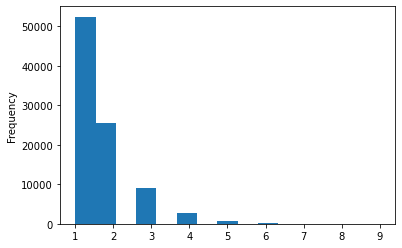

In [17]:
# 6. Income profiling
hist_income = df_customers['income'].value_counts().plot.hist(bins=15)

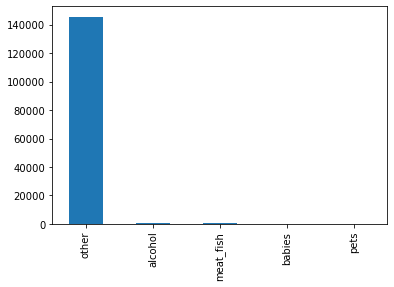

In [18]:
# 6. Goods profiling
bar_goods = df_customers['department'].value_counts().plot.bar()

In [19]:
goods_loyalty=pd.crosstab(df_customers['loyalty_flag'], df_customers['department'])
goods_loyalty

department,alcohol,babies,meat_fish,other,pets
loyalty_flag,,,,,
Loyal customer,4,0,2,17011,0
New customer,368,44,295,58855,20
Regular customer,128,5,86,69603,1


In [20]:
goods_time=pd.crosstab(df_customers['order_time'],df_customers['department'])
goods_time

department,alcohol,babies,meat_fish,other,pets
order_time,,,,,
0,2,0,3,1036,0
1,3,0,0,579,0
2,0,0,3,391,0
3,1,0,4,260,0
4,1,0,3,278,0
5,1,0,2,416,0
6,4,0,3,1275,0
7,7,2,6,3619,1
8,12,2,6,7190,1


In [21]:
goods_day=pd.crosstab(ords_prods_customers['orders_day_of_week'],ords_prods_customers['department'])
goods_day

department,alcohol,babies,meat_fish,other,pets
orders_day_of_week,,,,,
0,6948,35973,62497,2453146,6965
1,8458,32252,49616,2292536,6097
2,8471,24928,35797,1696335,4937
3,9301,23185,32527,1549574,5179
4,11006,22740,32454,1541553,5161
5,11431,22971,36606,1720306,5624
6,7865,25428,45294,1796018,6441


In [22]:
goods_users=pd.crosstab(df_customers['user_id'],df_customers['department'])
goods_users

department,alcohol,babies,meat_fish,other,pets
user_id,,,,,
2,0,0,0,1,0
3,0,0,0,1,0
4,1,0,0,0,0
5,0,0,0,1,0
6,0,0,1,0,0
...,...,...,...,...,...
206202,0,0,0,1,0
206204,0,0,0,1,0
206206,0,0,0,1,0


In [23]:
# 6. Dependents
dependent=pd.crosstab(df_customers['fam_status'], df_customers['dependant_group'])
dependent

dependant_group,has dependents,no dependents
fam_status,,
divorced/widowed,0,12618
living with parents and siblings,6829,0
married,102826,0
single,0,24149


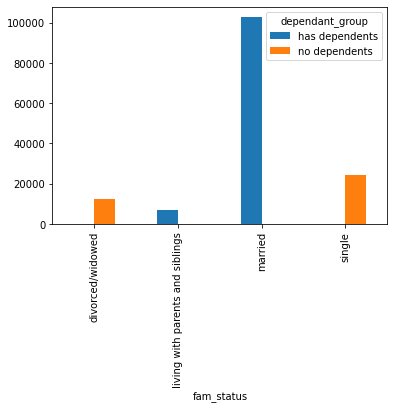

In [24]:
bar_dependent = dependent.plot.bar()

In [25]:
# Exporting Visualizations
bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_Age.png'))

In [26]:
hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Histogram_income.png'))

In [27]:
bar_dependent.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Bar_dependent.png'))

# 7. Aggregate the Max,  Mean and Min Variables


In [28]:
pd.set_option('display.max_columns', None)
df_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prices,spending_flag,median_days_prior_order,frecuency_flag,Gender,US State,Age,date_joined,n_dependants,fam_status,income,region,dpartment_id,age_group,income_group,department,dependant_group
0,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.000000,Mid-range product,Busiest days,Most orders,22,Regular customer,3.994141,Low spender,10,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,Midwest,7,older,low income,other,no dependents
31,2474845,19,6,5,13,20.0,17224,5,0,Oats & Honey Gluten Free Granola,3,19,1.599609,Low-range product,Regularly busy,Most orders,9,New customer,8.460938,Low spender,6,Frequent customer,Female,Louisiana,62,2/3/2017,1,married,151988,South,19,older,middle income,other,has dependents
117,1082944,21,14,1,9,10.0,47766,6,0,Organic Avocado,24,4,6.300781,Mid-range product,Busiest days,Most orders,33,Regular customer,6.988281,Low spender,7,Frequent customer,Male,Montana,71,6/18/2019,0,divorced/widowed,124643,West,4,older,middle income,other,no dependents
211,1593000,31,10,3,8,7.0,196,17,0,Soda,77,7,9.000000,Mid-range product,Least busy days,Average orders,20,Regular customer,8.203125,Low spender,6,Frequent customer,Female,Oklahoma,38,1/22/2019,1,married,52311,South,7,middle,low income,other,has dependents
356,2187180,43,9,4,12,3.0,196,1,1,Soda,77,7,9.000000,Mid-range product,Least busy days,Most orders,11,Regular customer,7.324219,Low spender,10,Frequent customer,Female,Tennessee,41,11/19/2018,1,married,123723,South,7,middle,middle income,other,has dependents


In [29]:
ords_prods_customers.groupby(['age_group']).agg({'order_number':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_number         prices          
                  mean min max   mean  min  max
age_group                                      
middle       19.756411   2  99    NaN  1.0  inf
older        19.694858   2  99    NaN  1.0  inf
young        19.666540   2  99    NaN  1.0  inf

In [30]:
ords_prods_customers.groupby(['income_group']).agg({'order_number':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_number            prices              
                      mean min max      mean  min      max
income_group                                              
high income      20.233351   2  99       NaN  1.0      inf
low income       19.184622   2  99  7.101562  1.0  14896.0
middle income    19.793471   2  99       NaN  1.0      inf

In [31]:
ords_prods_customers.groupby(['department']).agg({'order_number':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_number             prices           
                   mean min max       mean  min   max
department                                           
alcohol       17.803040   2  99   8.164062  1.0  15.0
babies        21.387525   2  99   7.621094  1.0  15.0
meat_fish     18.355571   2  99  16.296875  8.0  25.0
other         19.732825   2  99        NaN  1.0   inf
pets          17.747055   2  99   7.898438  1.0  15.0

In [32]:
ords_prods_customers.groupby(['dependant_group']).agg({'order_number':['mean', 'min', 'max'], 'prices':['mean', 'min', 'max']})

order_number         prices          
                        mean min max   mean  min  max
dependant_group                                      
has dependents     19.668910   2  99    NaN  1.0  inf
no dependents      19.836803   2  99    NaN  1.0  inf

# 8. Comparison: customer profiles with regions and departments 

In [33]:
age_region=pd.crosstab(df_customers['age_group'],df_customers['US State'])
age_region

US State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
middle,1124,1095,1154,1113,1061,1095,1150,1067,1115,1131,1098,1105,1104,1165,1134,1183,1131,1125,1167,1103,1070,1125,1144,1166,1107,1135,1073,1068,1166,1140,1100,1133,1133,1142,1121,1110,1137,1132,1122,1076,1133,1076,1122,1056,1116,1175,1127,1121,1139,1179,1145
older,966,987,933,936,970,926,955,963,929,915,968,915,923,909,951,969,901,959,918,937,975,971,949,957,943,949,995,928,917,941,942,953,952,909,909,953,921,937,968,956,971,947,942,935,966,946,940,943,918,921,935
young,813,789,823,828,833,851,822,834,777,835,788,799,803,842,798,719,803,790,774,822,821,803,780,781,816,815,786,847,792,796,767,823,821,815,800,797,829,818,818,813,794,794,808,846,798,764,808,808,789,779,825


In [34]:
age_department=pd.crosstab(df_customers['age_group'],df_customers['department_id'])
age_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_group,,,,,,,,,,,,,,,,,,,,,
middle,1116,6,305,39422,206,47,3159,9,117,0,49,135,1767,329,250,6550,342,20,2076,1299,5
older,900,0,271,33083,167,35,2747,6,74,1,62,147,1456,279,243,5507,326,18,1751,1043,3
young,745,6,227,28454,127,34,2187,6,79,2,41,101,1262,224,199,4805,259,11,1428,896,1


In [35]:
income_region=pd.crosstab(df_customers['income_group'],df_customers['US State'])
income_region

US State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
income_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high income,171,173,200,181,172,182,217,177,172,171,166,179,177,179,178,167,179,152,203,167,174,166,197,179,173,187,164,182,168,173,168,169,193,174,156,176,162,162,188,165,186,178,179,175,215,183,208,179,180,159,177
low income,702,669,692,655,650,677,692,705,661,683,699,674,698,689,669,668,666,691,622,684,706,701,673,628,688,670,682,700,713,667,657,708,641,692,654,681,702,715,681,683,709,646,693,676,682,686,667,728,662,710,668
middle income,2030,2029,2018,2041,2042,2013,2018,1982,1988,2027,1989,1966,1955,2048,2036,2036,1990,2031,2034,2011,1986,2032,2003,2097,2005,2042,2008,1961,1994,2037,1984,2032,2072,2000,2020,2003,2023,2010,2039,1997,2003,1993,2000,1986,1983,2016,2000,1965,2004,2010,2060


In [36]:
income_department=pd.crosstab(df_customers['income_group'],df_customers['department_id'])
income_department

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_group,,,,,,,,,,,,,,,,,,,,,
high income,171,1,45,6509,29,6,407,4,15,0,8,25,271,59,44,984,46,1,248,184,1
low income,739,6,251,20822,168,39,3074,5,82,1,53,68,1195,299,192,4318,356,20,2214,811,2
middle income,1851,5,507,73628,303,71,4612,12,173,2,91,290,3019,474,456,11560,525,28,2793,2243,6


In [37]:
department_region=pd.crosstab(df_customers['department'],df_customers['US State'])
department_region

US State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alcohol,10,6,5,6,16,12,6,10,16,12,14,8,12,8,14,11,7,8,8,11,10,11,11,12,9,13,10,13,8,6,8,10,4,6,5,7,12,8,9,13,12,13,6,11,9,8,12,11,8,12,13
babies,1,2,1,0,0,0,2,0,0,1,2,0,0,0,1,2,0,2,2,0,0,1,1,2,1,1,2,1,0,0,0,1,3,2,2,0,2,1,0,2,0,1,1,1,0,2,2,0,2,0,2
meat_fish,9,6,9,5,6,6,9,5,11,7,2,9,9,9,11,11,9,7,7,8,7,7,3,13,10,8,14,8,5,5,10,9,6,8,2,11,7,4,6,4,9,9,2,6,8,8,7,11,9,4,8
other,2883,2856,2894,2866,2842,2853,2910,2848,2794,2860,2836,2802,2808,2898,2857,2847,2819,2857,2842,2843,2848,2880,2858,2875,2845,2876,2828,2821,2862,2866,2791,2889,2892,2850,2821,2840,2865,2874,2893,2826,2877,2793,2862,2819,2863,2867,2853,2849,2827,2862,2882
pets,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,2,1,1,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0


In [38]:
dependent_region=pd.crosstab(df_customers['dependant_group'],df_customers['US State'])
dependent_region

US State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
dependant_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
has dependents,2171,2160,2137,2171,2157,2137,2157,2144,2138,2142,2136,2106,2154,2150,2125,2158,2141,2175,2167,2141,2136,2160,2167,2155,2146,2193,2171,2101,2147,2175,2094,2145,2195,2164,2155,2094,2161,2194,2164,2065,2168,2143,2140,2103,2160,2166,2143,2147,2170,2194,2172
no dependents,732,711,773,706,707,735,770,720,683,739,718,713,676,766,758,713,694,699,692,721,730,739,706,749,720,706,683,742,728,702,715,764,711,702,675,766,726,693,744,780,730,674,732,734,720,719,732,725,676,685,733


In [39]:
dependent_department=pd.crosstab(df_customers['dependant_group'],df_customers['department'])
dependent_department

department,alcohol,babies,meat_fish,other,pets
dependant_group,,,,,
has dependents,367,38,290,108944,16
no dependents,133,11,93,36525,5


# Part 2: 1. Ordering habits 

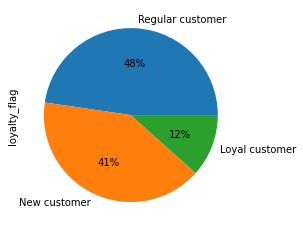

In [40]:
#Pie chart with loyalty_flag
pie_loyalty = df_customers['loyalty_flag'].value_counts().plot.pie(autopct='%1.0f%%')

[Text(0, 0, '7.90625'), Text(0, 0, '9.57812'), Text(0, 0, '8.95312')]

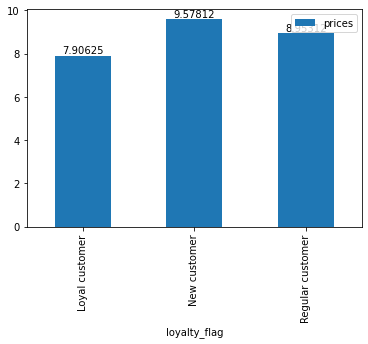

In [53]:
#Ordering habits based on loyalty status
loyalty_prices = df_customers.groupby('loyalty_flag').agg({'prices': 'mean'})
bar_loyalty_prices = loyalty_prices.plot.bar()
bar_loyalty_prices.bar_label(bar_loyalty_prices.containers[0])

[Text(0, 0, '9.07031'),
 Text(0, 0, '8.9375'),
 Text(0, 0, '9.28125'),
 Text(0, 0, '8.95312')]

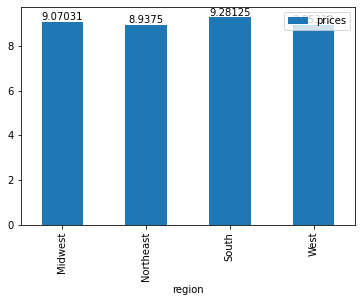

In [55]:
#Ordering habits based on customer's region
region_prices = df_customers.groupby('region').agg({'prices': 'mean'})
bar_region_prices = region_prices.plot.bar()
bar_region_prices.bar_label(bar_region_prices.containers[0])

[Text(0, 0, '8.78906'), Text(0, 0, '8.72656'), Text(0, 0, '9.92188')]

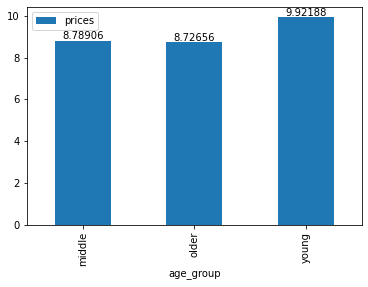

In [58]:
#Ordering habits based on age
age_prices = df_customers.groupby('age_group').agg({'prices': 'mean'})
bar_age_prices = age_prices.plot.bar()
bar_age_prices.bar_label(bar_age_prices.containers[0])

[Text(0, 0, '9.02344'),
 Text(0, 0, '7.77344'),
 Text(0, 0, '9.35938'),
 Text(0, 0, '8.34375')]

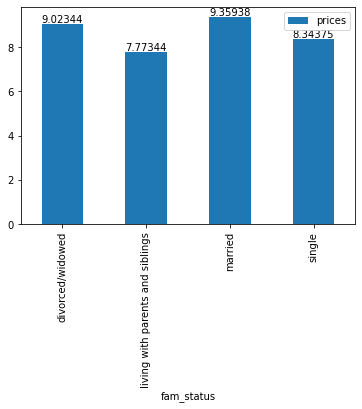

In [59]:
#Ordering habits based on family status
status_prices = df_customers.groupby('fam_status').agg({'prices': 'mean'})
bar_status_prices = status_prices.plot.bar()
bar_status_prices.bar_label(bar_status_prices.containers[0])

[Text(0, 0, '49.5572'),
 Text(0, 0, '49.6659'),
 Text(0, 0, '49.4883'),
 Text(0, 0, '49.5602')]

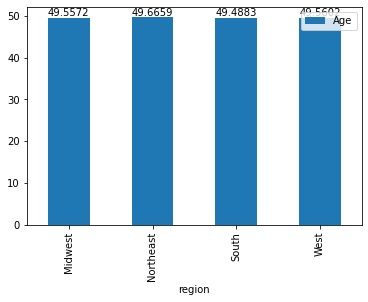

In [63]:
#Demographic information: age
region_age = df_customers.groupby('region').agg({'Age': 'mean'})
bar_region_age = region_age.plot.bar()
bar_region_age.bar_label(bar_region_age.containers[0])

[Text(0, 0, '96083.3'),
 Text(0, 0, '96085.6'),
 Text(0, 0, '95575.4'),
 Text(0, 0, '95573.9')]

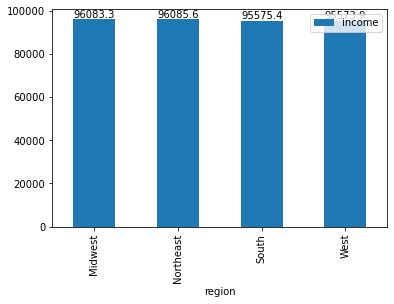

In [65]:
#Demographic information: income
region_income = df_customers.groupby('region').agg({'income': 'mean'})
bar_region_income = region_income.plot.bar()
bar_region_income.bar_label(bar_region_income.containers[0])

In [88]:
#Demographic information: family status
region_status=pd.crosstab(df_customers['region'],df_customers['fam_status'],normalize=True) *100
region_status

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,1.978528,1.081805,16.522107,3.918127
Northeast,1.572168,0.776523,12.416167,2.936034
South,2.866373,1.601535,23.377635,5.445903
West,2.200489,1.204054,17.909877,4.192676


In [89]:
#Demographic information: goods
region_goods=pd.crosstab(df_customers['region'],df_customers['department'],normalize=True) *100
region_goods

department,alcohol,babies,meat_fish,other,pets
region,,,,,
Midwest,0.086053,0.007513,0.066930,23.334608,0.005464
Northeast,0.051905,0.006830,0.043026,17.598448,0.000683
South,0.116103,0.012976,0.080589,33.076997,0.004781
West,0.087419,0.006147,0.071028,25.339088,0.003415


[Text(0, 0, '19.5781'), Text(0, 0, '7.19141'), Text(0, 0, '8.80469')]

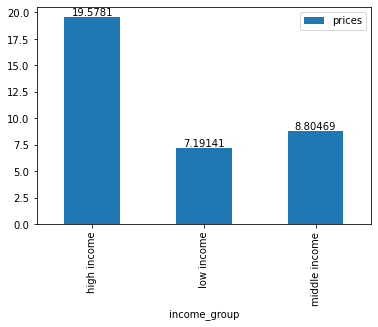

In [92]:
#Income group: prices 
income_prices = df_customers.groupby('income_group').agg({'prices': 'mean'})
bar_income_prices = income_prices.plot.bar()
bar_income_prices.bar_label(bar_income_prices.containers[0])